In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os.path

%matplotlib inline 

### Describe data ###

None Variable: 2
Quasar: 3
Be Stars: 4
Cepheid: 5
RR Lyrae: 6
Eclipsing Binaries: 7
MicroLensing: 8
Long Periodic Variable: 9


In [3]:
path = path = os.getcwd()
path = path + '/MACHO_ts/'

for idx,j in enumerate(os.listdir(path)):
# for index i,j in os.listdir(path):
    if j.endswith('.csv'):
        if idx == 0:
            data = pd.read_csv(path+j,index_col=0)
            data['Class'] = idx + np.ones(len(data))

        else:        
            data2 = pd.read_csv(path+j,index_col=0)
            data2['Class'] = idx + np.ones(len(data2))
            data = pd.concat([data, data2])

data = data.drop('Automean', 1)
data.to_csv('MACHO_ts.csv') 
            

In [13]:
data = pd.read_csv('/Users/isadoranun/Desktop/Features/time-series-feats/MACHO_ts.csv',index_col=0)
# data = data.replace([np.inf, -np.inf], np.nan)
# data = data.dropna()
# data.to_csv('MACHO_ts.csv') 
data.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_sigma,CAR_tau,CAR_tmean,Color,Con,Eta_color,...,Rcs,Skew,SlottedA_length,SmallKurtosis,Std,StetsonJ,StetsonK,StetsonK_AC,StetsonL,Class
80.6708.5218,0.12700,1,44,0.278136,-0.013622,37.158804,-0.195121,-0.356996,0.004307,4478.196740,...,0.275917,0.512233,0.026157,1.389718,0.063573,0.439091,0.763764,0.816338,0.274887,1
48.2742.1409,0.16525,1,1,0.185185,-0.053792,3.563116,-1.814895,-0.520699,0.000000,16.673054,...,0.207167,-1.929378,1.024734,7.272569,0.076998,0.006110,0.673988,0.721044,0.003726,1
53.3970.353,0.14600,1,19,0.291367,-0.003886,490.231454,-0.010910,-0.435427,0.000000,2628.279811,...,0.300025,0.387355,15.233322,0.318671,0.072600,0.399034,0.769279,0.765331,0.280160,1
14.8863.660,0.13200,1,146,0.316737,-0.020506,23.280406,-0.291598,-0.260269,0.001062,2390.816592,...,0.372110,-0.547138,306.215875,-0.031463,0.072473,0.721305,0.814942,0.743765,0.606026,1
11.8751.968,0.48125,1,41,0.251832,-0.016820,216.659786,-0.022690,0.386472,0.003670,577.076785,...,0.283297,0.464646,0.319352,1.554634,0.245696,0.599099,0.778154,0.718825,0.443962,1


In [5]:
features = data.columns[:-1]
data[features].describe()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Color,Con,Eta_color,...,Q31_color,Rcs,Skew,SlottedA_length,SmallKurtosis,Std,StetsonJ,StetsonK,StetsonK_AC,StetsonL
count,6059.000000,6059.000000,6059.000000,6059.000000,6.059000e+03,6059.000000,6.059000e+03,6059.000000,6059.000000,6059.000000,...,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000
mean,0.519397,0.998226,4.352038,0.240903,-2.277358e+02,-0.079005,6.225808e+05,0.203994,0.002906,7512.680054,...,0.258388,0.070828,-0.364556,3.870990,4.662114,0.253624,2.480975,0.697318,0.676395,1.586759
std,0.333183,0.025027,17.382213,0.069366,8.350208e+02,1.392570,2.277782e+07,0.527061,0.008048,42221.064803,...,0.185111,0.062739,0.794843,28.957735,4.734108,0.161759,8.731419,0.089044,0.093987,6.327304
min,0.020250,0.341722,1.000000,0.044944,-1.091337e+04,-12.148201,4.728890e-04,-1.022921,0.000000,1.000000,...,0.009000,0.019402,-6.136411,0.011111,-1.515619,0.011412,-0.390739,0.300758,0.250155,-0.168368
25%,0.259000,1.000000,1.000000,0.197246,-1.024065e+02,-0.217989,4.820299e-02,-0.165038,0.000000,1385.617661,...,0.114000,0.038934,-0.740190,0.109699,2.091797,0.129221,0.112678,0.655451,0.620188,0.048919
50%,0.462500,1.000000,1.000000,0.222017,-3.731868e+00,-0.028763,1.157814e+00,0.091590,0.000000,3713.568491,...,0.210000,0.049829,-0.420020,0.123739,4.213186,0.228810,0.229614,0.727856,0.663038,0.100733
75%,0.715500,1.000000,1.000000,0.263002,-2.668921e-01,0.018142,1.809315e+01,0.405055,0.001699,7600.263528,...,0.370000,0.070573,-0.009542,0.203970,6.442585,0.346826,1.125956,0.758480,0.726113,0.486254
max,3.144000,1.000000,323.000000,0.788321,-3.600000e-09,25.646470,1.379351e+09,3.263769,0.143713,1807743.974000,...,1.469000,0.462523,10.406876,527.874240,172.925347,1.718985,162.784782,0.888030,0.952755,106.699281


In [6]:
print 'Data size:',len(data)

Data size: 6059


In [7]:
print "number of features: %i " %(len(data.columns[:-1]))

counts = pd.DataFrame(data.dropna().groupby(by='Class').CAR_sigma.count())
counts.columns = ['count']
counts

number of features: 64 


,count
Class,
1,127
2,101
3,255
4,361
5,580
6,3963
7,59
8,613


In [14]:
print "number of features: %i " %(len(data.columns[:-1]))

counts = pd.DataFrame(data.dropna().groupby(by='Class').CAR_sigma.count())
counts.columns = ['count']
counts

number of features: 64 


,count
Class,
1,127
2,101
3,255
4,365
5,580
6,3966
7,59
8,610


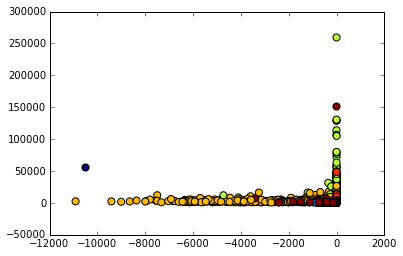

In [8]:
y = data['Class']
plt.scatter(data.iloc[:,4], data.iloc[:,10], c=y, s=50)

### Random forest classification ###

In [9]:
Xr, Xt, yr, yt = train_test_split(data[features], data['Class'], train_size=5000, test_size=1059, random_state=42)


In [10]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(Xr, yr)

ypred = clf.predict(Xt)
print 'confusion matrix: \n' 
print (confusion_matrix(yt, ypred))
print '\n ========================================= \n '
print 'score of accuracy %f' % (clf.score(Xt, yt))


confusion matrix: 

[[ 25   0   0   1   0   0   2   1]
 [  0  17   1   0   0   1   0   0]
 [  0   1  47   1   0   0   0   3]
 [  0   0   1  72   1   0   0   0]
 [  0   0   0   0  86   0   0   0]
 [  0   0   0   3   3 677   0   1]
 [  2   0   0   0   0   1   6   0]
 [  0   0   6   0   0   0   2  98]]

 
score of accuracy 0.970727


Confusion matrix, without normalization
[[ 25   0   0   1   0   0   2   1]
 [  0  17   1   0   0   1   0   0]
 [  0   1  47   1   0   0   0   3]
 [  0   0   1  72   1   0   0   0]
 [  0   0   0   0  86   0   0   0]
 [  0   0   0   3   3 677   0   1]
 [  2   0   0   0   0   1   6   0]
 [  0   0   6   0   0   0   2  98]]
Normalized confusion matrix
[[ 0.86  0.    0.    0.03  0.    0.    0.07  0.03]
 [ 0.    0.89  0.05  0.    0.    0.05  0.    0.  ]
 [ 0.    0.02  0.9   0.02  0.    0.    0.    0.06]
 [ 0.    0.    0.01  0.97  0.01  0.    0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.99  0.    0.  ]
 [ 0.22  0.    0.    0.    0.    0.11  0.67  0.  ]
 [ 0.    0.    0.06  0.    0.    0.    0.02  0.92]]


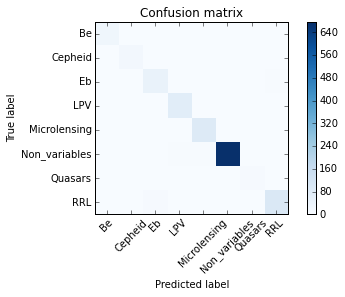

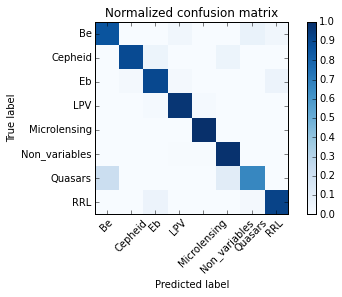

In [11]:
labels = ['Be','Cepheid','Eb','LPV','Microlensing','Non_variables','Quasars','RRL']

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(yt, ypred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.savefig("confusion_matrix.png",dpi=300, bbox_inches='tight') 
plt.show()


##### scores = cross_val_score(clf, Xt, yt, cv=2) print("Accuracy: %0.2f (+/- %0.2f)"       % (scores.mean(), scores.std()*2))

In [11]:
def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=[8,10])
    plt.pcolormesh(xx, yy, Z, alpha=0.15,cmap = 'hsv')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c = y, s=50)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

In [12]:
plot_estimator(clf, data[features], data['Class'].values)

TypeError: unhashable type

### pruning for $ \textit{max_depths} $ for decision tree ###

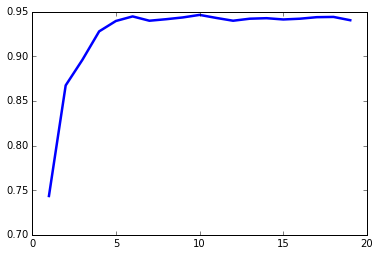

In [72]:

kfold = KFold(Xr.shape[0], n_folds=10)
accs = []
max_depths = range(1, 20)
for max_depth in max_depths:
    k_accs = []
    for train, test in kfold:
        Xtrain, Xtest, ytrain, ytest = Xr[train], Xr[test], yr[train], yr[test]
        clf = DecisionTreeClassifier(max_depth=max_depth)
        clf.fit(Xtrain, ytrain)
        ypred = clf.predict(Xtest)
        k_accs.append(accuracy_score(ytest, ypred))
    accs.append(np.mean(k_accs))
# plot the accuracies as a function of max_depth
plt.plot(max_depths, accs, linewidth=2.5)

### Boosting to tune $ \textit{number of trees} $ ###

Boosting builds lots of small trees. Unlike Random Forests, each tree tries to make up for the deficiencies in the current ensemble. With Boosting, the number of trees is a tuning parameter. Using the same train/test split, we plot the variance of MSE against the number of trees.

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


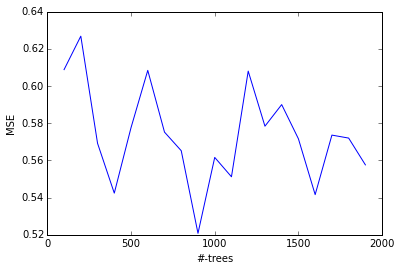

In [73]:
num_trees = range(100, 2000, 100)
mses = []
for num_tree in num_trees:
    print (num_tree)
    reg = RandomForestClassifier(n_estimators=num_tree)
    reg.fit(Xr, yr)
    ypred = reg.predict(Xt)
    mses.append(mean_squared_error(yt, ypred))
plt.plot(num_trees, mses)
plt.xlabel("#-trees")
plt.ylabel("MSE")

### tuning for $ \textit{max_features} $ ###

In [13]:
oob_scores = []
mses = []
num_feats = range(1, 65)
for num_feat in num_feats:
    clf = RandomForestClassifier(n_estimators=500, max_features=num_feat, oob_score=True)
    clf.fit(Xr, yr)
    ypred = clf.predict(Xt)
    mses.append(mean_squared_error(yt, ypred))
    oob_scores.append(clf.oob_score_)
plt.plot(num_feats, mses, color='b', linewidth=2.5);
plt.plot(num_feats, oob_scores, color='r', linewidth=2.5);
plt.xlabel("features")
plt.ylabel("MSE (blue); OOB (red)")

KeyboardInterrupt: 

### standard scale data to center around 0 ###

In [56]:
def stand_features(data, feature_names = 'all'):
    if feature_names == 'all': 
        column_names = data.columns
        data = pd.DataFrame(StandardScaler().fit_transform(data), columns=column_names)
    else:
        data[feature_names] = pd.DataFrame(StandardScaler().fit_transform(data), columns=feature_names)
    return data       

In [57]:
newData = stand_features(train)
newData.head()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [48]:
clf = RandomForestClassifier(n_estimators=500)
clf.fit(Xr, yr)

print clf.score(Xt, yt)

0.97177798683


### random forest for feature importance ###

** Features used at the top of the tree are used contribute to the final prediction decision of a larger fraction of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate of the relative importance of the features. **

/Users/isadoranun/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


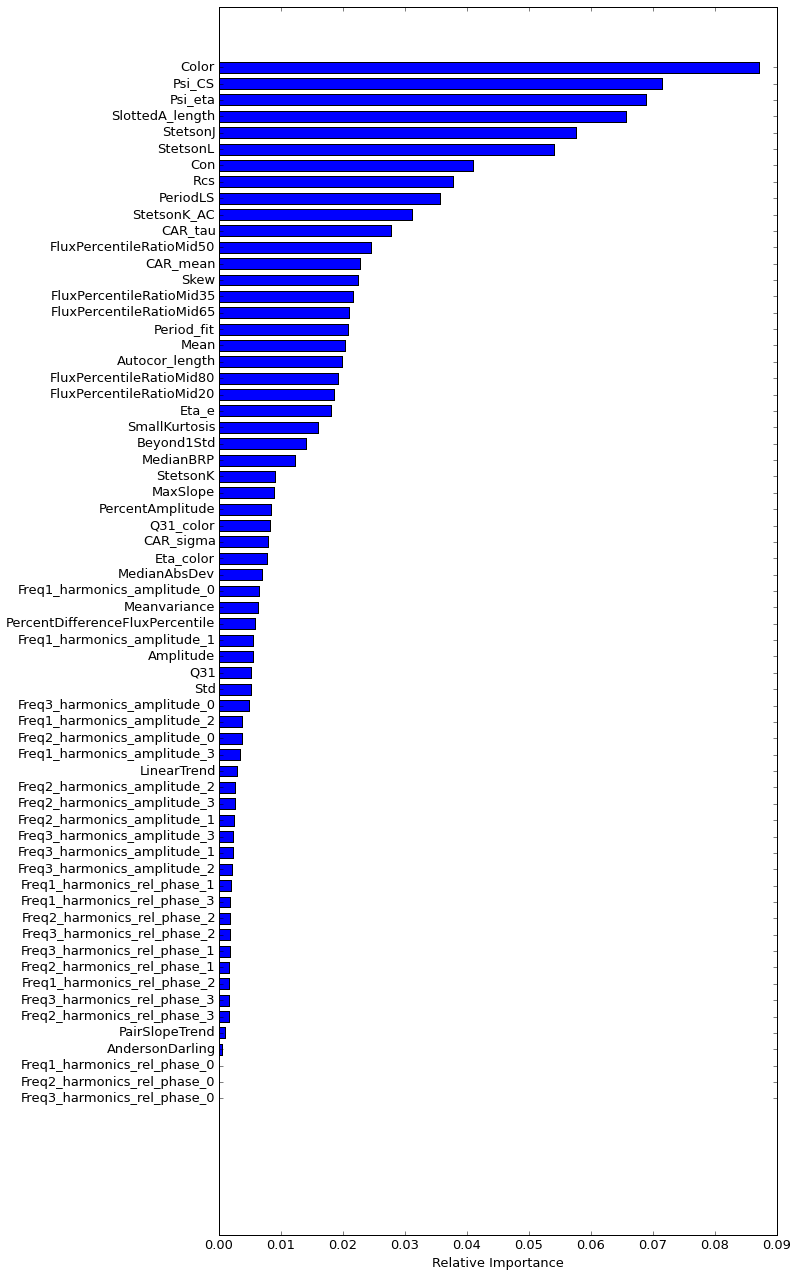

In [12]:
# look up the specific algorithm
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}
plt.rc('font', **font)
plt.figure(figsize = [10,22])
padding = (np.arange(len(features)))*1.2+10
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
# plt.title("Variable Importance")
plt.savefig('importance.png',dpi=300, bbox_inches='tight')

### SVM for classification ###

    1. Linear Kernal: no real transformation on the data
        Parameters: C (the ratio of how much emphasis we want to put on minimizing the error or maximizing the margin. Large C: Lower bias, higher variance, pro to overfitting)
    2. Polynomial Kernal: of degre k on n original features yields O(n^k) expanded features
        Parameters: C, degree(of the polynomial), gamma(coefficient of the polynomial)
    3. RBF Kernal: normal, yield infinitely many expanded features
        Parameters: gamma(1/gamma is the variance)

In [48]:
clf = svm.linearSVC()
clf.fit(Xr, yr)
print 'score of accuracy %f' % (clf.score(Xt, yt))

AttributeError: 'module' object has no attribute 'linearSVC'

### deep learning ###

In [4]:
import theano
import theano.tensor as T

In [5]:
theano.__version__
print theano.config.device

cpu


In [113]:
pd.reset_option('display.max_rows')

path ='/Users/isadoranun/Desktop/Features/F_1/'


data1 = pd.read_csv('F_1_3319.csv',index_col=0)
data2 = pd.read_csv('F_1_3319_2.csv',index_col=0)

data1.Rcs = data2.Rcs

features = data2.columns[1:-1]
data2 = data2[features]

concatenate = pd.merge(data1,data2, left_index=True, right_index=True, how='outer')
concatenate.head()


,Amplitude,AndersonDarling,B_R,Beyond1Std,Bmean,CAR_sigma,CAR_tau,CAR_tmean,Con,Eta_B_R,...,Std,StetsonJ,StetsonK,StetsonK_AC,StetsonL,autocor,automean,meanvariance,Psi_CS,Psi_eta
1.3319.23,0.42450,1,0.249543,0.196115,-4.938551,-0.165672,1.206547,-4.093127,0.000000,6818.615959,...,0.199041,0.187266,0.637712,0.457122,0.100231,2,-4.938551,-0.040304,0.085552,1.836131
1.3319.11,0.06800,1,-0.409863,0.264388,-7.432300,-0.028999,3.137702,-2.368708,0.004505,3426.229184,...,0.035677,0.435276,0.716623,0.875010,0.196524,13,-7.432300,-0.004800,0.151780,1.644436
1.3319.42,0.73575,1,-0.278173,0.229023,-4.117237,0.226868,2.019573,-2.038667,0.000000,2511.253694,...,0.360103,0.213843,0.707300,0.482501,0.136990,2,-4.117237,-0.087462,0.059685,1.871534
1.3319.33,0.84100,1,-0.281362,0.232558,-4.056352,0.019112,251.327957,-0.016140,0.000000,632.585112,...,0.440170,0.325442,0.727188,0.464172,0.213371,2,-4.056352,-0.108514,0.058776,1.958520
1.3319.34,0.35600,1,-0.720231,0.205993,-4.844879,-0.154069,0.974836,-4.969945,0.000938,5246.245871,...,0.179034,0.181015,0.674830,0.407155,0.086707,2,-4.844879,-0.036953,0.047025,1.992605


In [10]:
data.to_csv('yelp_academic_dataset_user.csv') 

In [11]:
data.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_sigma,CAR_tau,CAR_tmean,Color,Con,Eta_color,...,Rcs,Skew,SlottedA_length,SmallKurtosis,Std,StetsonJ,StetsonK,StetsonK_AC,StetsonL,Class
80.6708.5218,0.12700,1,44,0.278136,-0.013622,37.158804,-0.195121,-0.356996,0.004307,4478.196740,...,0.275917,0.512233,0.026157,1.389718,0.063573,0.439091,0.763764,0.816338,0.274887,1
48.2742.1409,0.16525,1,1,0.185185,-0.053792,3.563116,-1.814895,-0.520699,0.000000,16.673054,...,0.207167,-1.929378,1.024734,7.272569,0.076998,0.006110,0.673988,0.721044,0.003726,1
53.3970.353,0.14600,1,19,0.291367,-0.003886,490.231454,-0.010910,-0.435427,0.000000,2628.279811,...,0.300025,0.387355,15.233322,0.318671,0.072600,0.399034,0.769279,0.765331,0.280160,1
14.8863.660,0.13200,1,146,0.316737,-0.020506,23.280406,-0.291598,-0.260269,0.001062,2390.816592,...,0.372110,-0.547138,306.215875,-0.031463,0.072473,0.721305,0.814942,0.743765,0.606026,1
11.8751.968,0.48125,1,41,0.251832,-0.016820,216.659786,-0.022690,0.386472,0.003670,577.076785,...,0.283297,0.464646,0.319352,1.554634,0.245696,0.599099,0.778154,0.718825,0.443962,1
